In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

In [83]:
df = pd.read_csv('Health_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [84]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [85]:
df.duplicated().sum()
# df.drop_duplicates(inplace = True)

1

In [86]:
df.shape

(1338, 7)

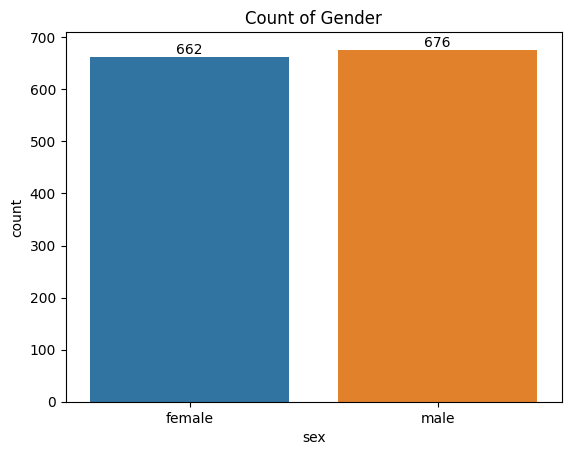

In [87]:
ax = sns.countplot(data = df,x = 'sex')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Count of Gender')
plt.show()


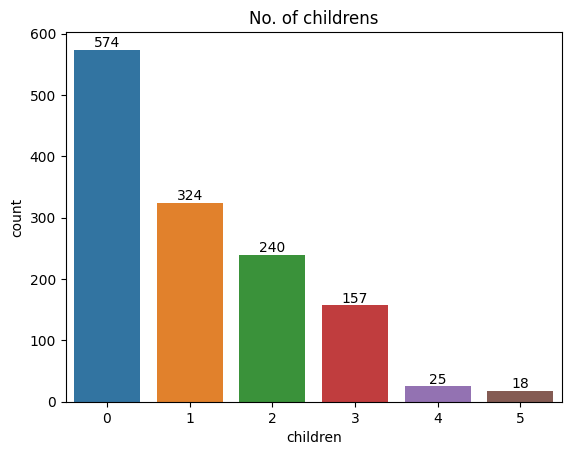

In [88]:
ax = sns.countplot(data = df,x = 'children')
for label in ax.containers:
    ax.bar_label(label)
plt.title('No. of childrens')
plt.show()

Text(0.5, 1.0, 'Age Range')

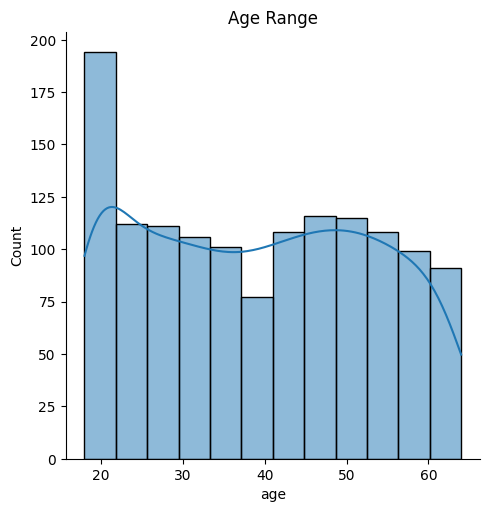

In [89]:
sns.displot(df['age'],kde = True)
plt.title('Age Range')

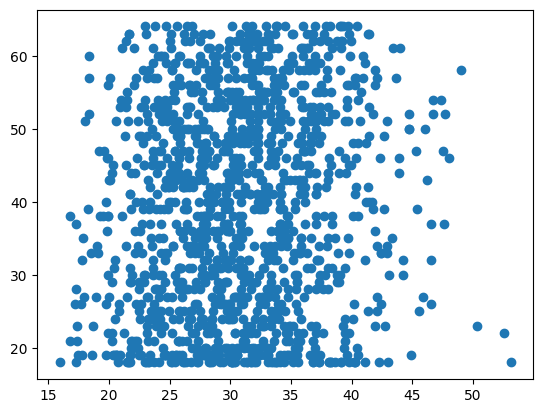

In [90]:
plt.scatter(df['bmi'],df['age'])

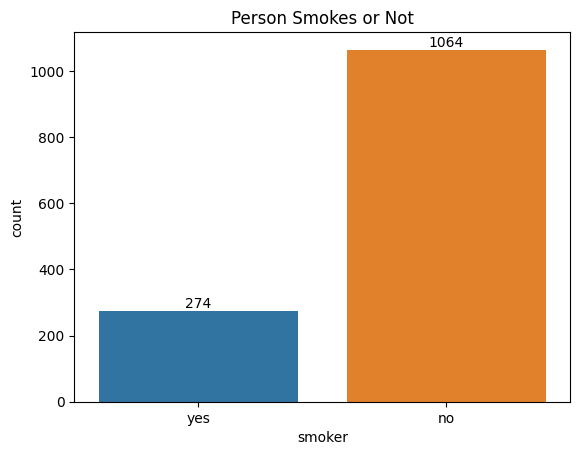

In [91]:
ax = sns.countplot(data = df,x = 'smoker')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Person Smokes or Not')
plt.show()

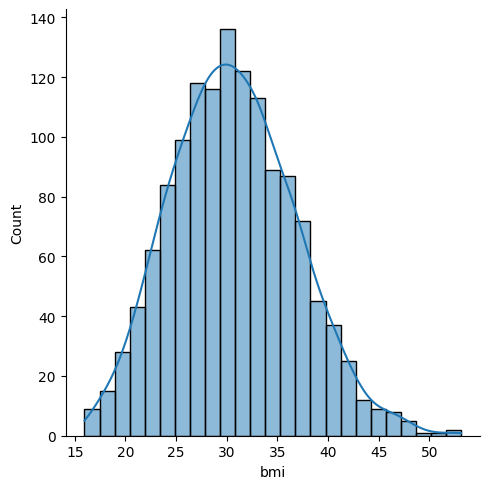

In [92]:
sns.displot(df['bmi'],kde = True)

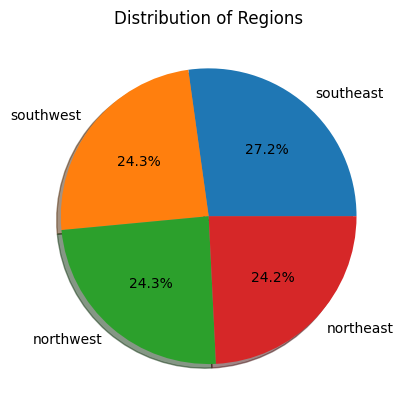

In [93]:
region_distribution = df['region'].value_counts()
plt.pie(region_distribution, labels=region_distribution.index, autopct='%1.1f%%',shadow = True)
# plt.axis('equal')
plt.title('Distribution of Regions')

plt.show()

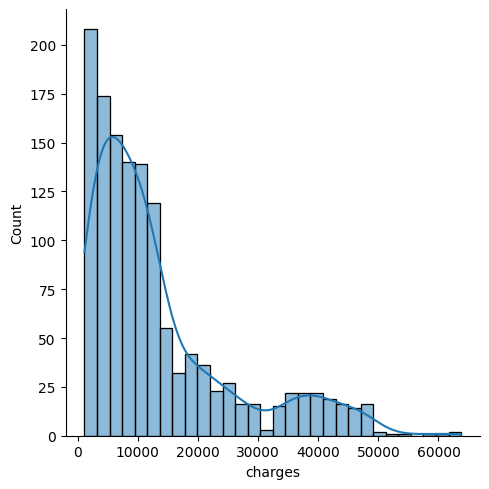

In [94]:
sns.displot(df['charges'],kde = True)

In [102]:
lower[0]

array([], dtype=int64)

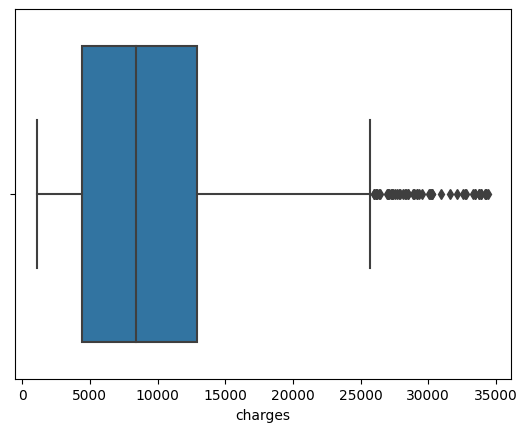

In [103]:
# Importing
import sklearn
# from sklearn.datasets import load_boston

# IQR
Q1 = np.percentile(df['charges'], 25,interpolation = 'midpoint')

Q3 = np.percentile(df['charges'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['charges'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['charges'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='charges', data=df)
plt.show()


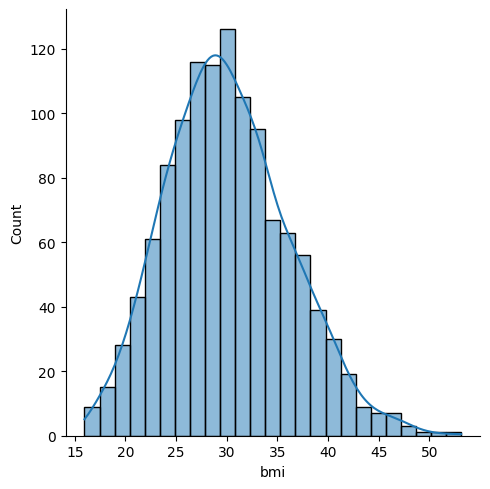

In [41]:
sns.displot(df['bmi'],kde = True)

In [112]:
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

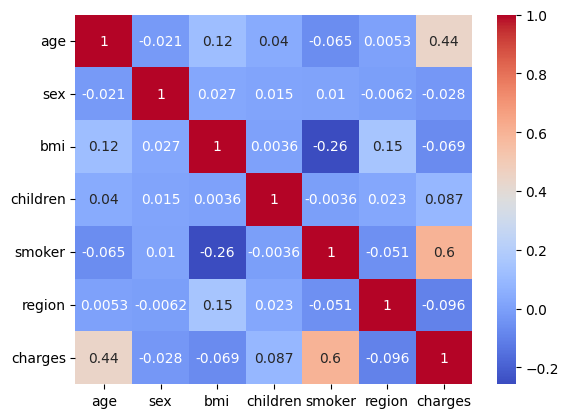

In [113]:
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')
plt.show()

In [114]:
df[df['bmi'] > 48]

,age,sex,bmi,children,smoker,region,charges
847,23,1,50.38,1,0,2,2438.0552
1317,18,1,53.13,0,0,2,1163.4627


In [116]:
# df.drop([847,1047,1317],inplace = True)
# df.drop([116,286],inplace = True)


In [117]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000
mean,38.980769,0.489130,30.062136,1.085284,0.114548,1.494147,9906.429128
std,14.066803,0.500091,5.969866,1.214729,0.318610,1.108717,7215.221980
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,25.800000,0.000000,0.000000,1.000000,4401.607500
50%,39.000000,0.000000,29.735000,1.000000,0.000000,1.000000,8345.036525
75%,51.000000,1.000000,33.820000,2.000000,0.000000,2.000000,12951.832900
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,34439.855900


In [118]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df[['charges']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [119]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(xtrain, ytrain)

RandomForestRegressor()

In [120]:
ypred = forest.predict(xtest)
data = pd.DataFrame(data={"Predicted Premium Amount": ypred})
data

,Predicted Premium Amount
0,9041.692437
1,2090.661867
2,14142.067388
3,9842.824198
4,17346.966265
...,...
235,5784.942989
236,12516.166193
237,6488.780948
238,15096.789389


In [121]:
# Linear Model
reg = linear_model.LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [122]:
regp = reg.predict(xtest)

In [123]:
# RMSE of RandomForest
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(ytest, ypred))
print("RMSE:", rmse)

RMSE: 4230.209520864083


In [124]:
# RMSE of LinearRegression
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(ytest, regp))
print("RMSE:", rmse)

RMSE: 4185.425811184168


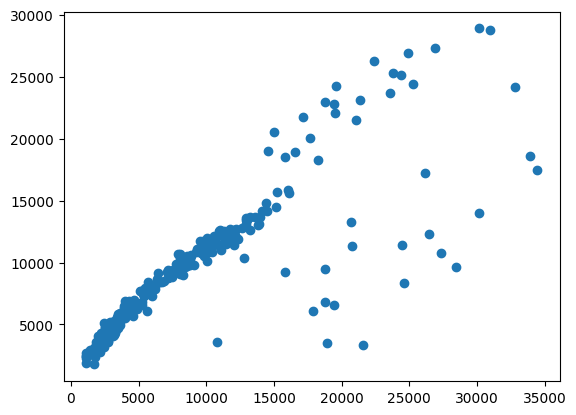

In [130]:
# Scatter Plot To show the linearity of the model
plt.scatter(ytest,regp)

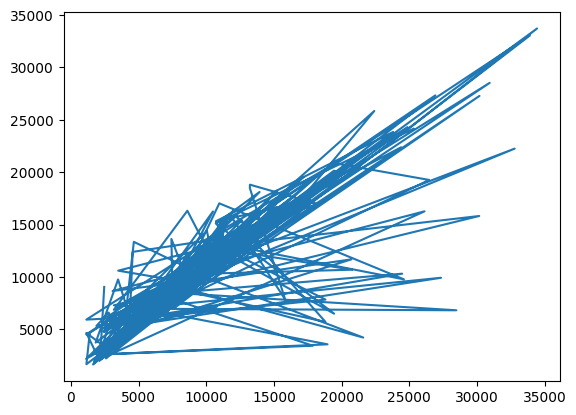

In [131]:
# Line Plot To show the linearity of the model
plt.plot(ytest,ypred)